BLS Industry Productivity 

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###### Necessary packages imported, now to load the data:

In [2]:
labor_productivity = pd.read_csv("Data/labor-productivity.csv")
labor_productivity.head()

,Sector,NAICS,Industry,Digit,Basis,Measure,Units,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Mining,21,Mining,2-Digit,All workers,Labor productivity,% Change from previous year,N.A.,2.3,-0.6,...,0.4,8.9,5.3,17.6,18.6,3.5,3,6.2,18.2,1
1,Mining,21,Mining,2-Digit,All workers,Real sectoral output,% Change from previous year,N.A.,2.1,-0.6,...,8.3,8.5,12.5,3.8,-4.9,4,12,8.5,-7.2,0.6
2,Mining,21,Mining,2-Digit,All workers,Hours worked,% Change from previous year,N.A.,-0.2,0,...,7.9,-0.3,6.9,-11.7,-19.9,0.5,8.8,2.2,-21.5,-0.4
3,Mining,21,Mining,2-Digit,All workers,Output per worker,% Change from previous year,N.A.,2.6,2.4,...,0.9,7.1,8.2,14.2,17.1,3.5,3.6,8.2,13.9,6.6
4,Mining,21,Mining,2-Digit,All workers,Unit labor costs,% Change from previous year,N.A.,4.5,1.2,...,1.9,-5.3,-3.6,-13.5,-13.3,-3.8,-2.2,-3.6,-11.7,-10.6


###### Showing all values for "Industry" column:

In [3]:
labor_productivity['Industry'].unique()

array(['Mining', 'Oil and gas extraction', 'Mining, except oil and gas',
       'Support activities for mining', 'Coal mining', 'Metal ore mining',
       'Nonmetallic mineral mining and quarrying',
       'Stone mining and quarrying',
       'Sand, gravel, clay, and ceramic and refractory minerals mining and quarrying',
       'Other nonmetallic mineral mining and quarrying', 'Utilities',
       'Power generation and supply', 'Natural gas distribution',
       'Water, sewage and other systems', 'Food manufacturing',
       'Beverages and tobacco products', 'Textile mills',
       'Textile product mills', 'Apparel', 'Leather and allied products',
       'Wood products', 'Paper and paper products',
       'Printing and related support activities',
       'Petroleum and coal products', 'Chemicals',
       'Plastics and rubber products', 'Nonmetallic mineral products',
       'Primary metals', 'Fabricated metal products', 'Machinery',
       'Computer and electronic products',
       'Ele

###### Showing all values for "Sector" column:

In [4]:
labor_productivity['Sector'].unique()

array(['Mining', 'Utilities', 'Manufacturing', 'Wholesale Trade',
       'Retail Trade', 'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)'], dtype=object)

###### Selecting only the columns of interest:

In [5]:
pandemic_changes = labor_productivity[['Sector', 'Industry', 'Measure', 'Units', '2019', '2020', '2021']]
pandemic_changes

,Sector,Industry,Measure,Units,2019,2020,2021
0,Mining,Mining,Labor productivity,% Change from previous year,6.2,18.2,1
1,Mining,Mining,Real sectoral output,% Change from previous year,8.5,-7.2,0.6
2,Mining,Mining,Hours worked,% Change from previous year,2.2,-21.5,-0.4
3,Mining,Mining,Output per worker,% Change from previous year,8.2,13.9,6.6
4,Mining,Mining,Unit labor costs,% Change from previous year,-3.6,-11.7,-10.6
...,...,...,...,...,...,...,...
15658,Other Services (except Public Administration),Drycleaning and laundry services (except coin-...,Employment,Index (2012=100),81.772,63.228,55.949
15659,Other Services (except Public Administration),Drycleaning and laundry services (except coin-...,Hours worked,Millions of hours,209.051,154.982,136.414
15660,Other Services (except Public Administration),Drycleaning and laundry services (except coin-...,Sectoral output,Millions of current dollars,"8,920.66","6,238.16","7,389.79"
15661,Other Services (except Public Administration),Drycleaning and laundry services (except coin-...,Labor compensation,Millions of current dollars,"3,661.20","2,668.49","2,723.52"


In [6]:
labor_changes_df = labor_productivity[['Sector', 'Industry', 'Measure', 'Units', '2007', '2008', '2009']]
labor_changes_df.head()

,Sector,Industry,Measure,Units,2007,2008,2009
0,Mining,Mining,Labor productivity,% Change from previous year,-7.9,-2.2,13.7
1,Mining,Mining,Real sectoral output,% Change from previous year,0.6,0.9,-0.2
2,Mining,Mining,Hours worked,% Change from previous year,9.1,3.1,-12.3
3,Mining,Mining,Output per worker,% Change from previous year,-7,-4.9,9.5
4,Mining,Mining,Unit labor costs,% Change from previous year,13.6,11.7,-11.3


In [7]:
labor_changes_df['Measure'].unique()

array(['Labor productivity', 'Real sectoral output', 'Hours worked',
       'Output per worker', 'Unit labor costs', 'Sectoral output',
       'Sectoral output price deflator', 'Hourly compensation',
       'Labor compensation', 'Employment', 'Total factor productivity',
       'Combined inputs', 'Combined inputs costs',
       'Combined inputs price deflator', 'Capital input', 'Capital costs',
       'Capital share', 'Capital productivity', 'Capital intensity',
       'Labor share', 'Intermediate inputs', 'Intermediate inputs costs',
       'Intermediate inputs share', 'Intermediate inputs productivity',
       'Intermediate inputs intensity',
       'Contribution of capital intensity to labor productivity',
       'Contribution of intermediate inputs intensity to labor productivity'],
      dtype=object)

In [8]:
empl_2020 = pandemic_changes[(pandemic_changes['Measure'].isin(['Employment']))]
empl_2020 = empl_2020[(empl_2020['Units'].isin(['% Change from previous year']))]

In [9]:
empl_2020.head()

,Sector,Industry,Measure,Units,2019,2020,2021
9,Mining,Mining,Employment,% Change from previous year,0.3,-18.5,-5.6
32,Mining,Oil and gas extraction,Employment,% Change from previous year,1.3,-8.6,-10.5
55,Mining,"Mining, except oil and gas",Employment,% Change from previous year,-0.7,-8.6,-0.5
78,Mining,Support activities for mining,Employment,% Change from previous year,0.4,-27.9,-6.7
101,Mining,Oil and gas extraction,Employment,% Change from previous year,1.3,-8.6,-10.5


In [10]:
empl_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 9 to 15649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sector    477 non-null    object
 1   Industry  477 non-null    object
 2   Measure   477 non-null    object
 3   Units     477 non-null    object
 4   2019      477 non-null    object
 5   2020      477 non-null    object
 6   2021      477 non-null    object
dtypes: object(7)
memory usage: 29.8+ KB


In [11]:
#empl_2020 = empl_2020['2019'].dropna()
#empl_2020 = empl_2020['2020'].dropna()
#empl_2020 = empl_2020['2021'].dropna()

In [12]:
empl_2020['2019'] = empl_2020['2019'].replace('N.A.', 0)

In [13]:
empl_2020['2020'] = empl_2020['2020'].replace('N.A.', 0)

In [14]:
empl_2020['2021'] = empl_2020['2021'].replace('N.A.', 0)

In [15]:
empl_2020.loc[(empl_2020!=0).any(axis=1)]

,Sector,Industry,Measure,Units,2019,2020,2021
9,Mining,Mining,Employment,% Change from previous year,0.3,-18.5,-5.6
32,Mining,Oil and gas extraction,Employment,% Change from previous year,1.3,-8.6,-10.5
55,Mining,"Mining, except oil and gas",Employment,% Change from previous year,-0.7,-8.6,-0.5
78,Mining,Support activities for mining,Employment,% Change from previous year,0.4,-27.9,-6.7
101,Mining,Oil and gas extraction,Employment,% Change from previous year,1.3,-8.6,-10.5
...,...,...,...,...,...,...,...
15557,Other Services (except Public Administration),Photofinishing,Employment,% Change from previous year,-2.1,-24.2,-2.9
15580,Other Services (except Public Administration),Reupholstery and furniture repair,Employment,% Change from previous year,-5.1,-14.7,3.1
15603,Other Services (except Public Administration),Funeral homes and funeral services,Employment,% Change from previous year,0.6,-7.3,6.5
15626,Other Services (except Public Administration),Coin-operated laundries and drycleaners,Employment,% Change from previous year,-0.2,-5.6,-4.9


In [16]:
empl_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 9 to 15649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sector    477 non-null    object
 1   Industry  477 non-null    object
 2   Measure   477 non-null    object
 3   Units     477 non-null    object
 4   2019      477 non-null    object
 5   2020      477 non-null    object
 6   2021      477 non-null    object
dtypes: object(7)
memory usage: 29.8+ KB


In [17]:
#empl_2020 = empl_2020[(empl_2020['2019'].isin('N.A.')==('0'))]

In [18]:
empl_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 9 to 15649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sector    477 non-null    object
 1   Industry  477 non-null    object
 2   Measure   477 non-null    object
 3   Units     477 non-null    object
 4   2019      477 non-null    object
 5   2020      477 non-null    object
 6   2021      477 non-null    object
dtypes: object(7)
memory usage: 29.8+ KB


In [19]:
empl_2020_ =  empl_2020.astype({'2019': 'float', '2020': 'float', '2021': 'float'})

In [20]:
#empl_2020_ = empl_2020['2019'].astype('float')

In [21]:
empl_2020_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 9 to 15649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sector    477 non-null    object 
 1   Industry  477 non-null    object 
 2   Measure   477 non-null    object 
 3   Units     477 non-null    object 
 4   2019      477 non-null    float64
 5   2020      477 non-null    float64
 6   2021      477 non-null    float64
dtypes: float64(3), object(4)
memory usage: 29.8+ KB


In [22]:
empl_2020['Sector'].unique()

array(['Mining', 'Utilities', 'Manufacturing', 'Wholesale Trade',
       'Retail Trade', 'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)'], dtype=object)

In [392]:
empl_19 = empl_2020_.groupby('Sector')['2019'].mean().reset_index()

In [393]:
empl_20 = empl_2020_.groupby('Sector')['2020'].mean().reset_index()

In [394]:
empl_21 = empl_2020_.groupby('Sector')['2021'].mean().reset_index()

In [412]:
empl_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sector  15 non-null     object 
 1   2021    15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [413]:
df_19_20_21 = empl_19.merge(empl_20,on='Sector').merge(empl_21,on='Sector')

In [414]:
#df_19_20_21 = df_19_20_21.set_index('Sector')
df_19_20_21.head()

,Sector,2019,2020,2021
0,Accommodation and Food Services,1.900000,-25.092857,7.271429
1,Administrative and Support and Waste Managemen...,-0.366667,-15.300000,-4.616667
2,"Arts, Entertainment, and Recreation",2.700000,-28.820000,14.510000
3,Finance and Insurance,0.800000,-0.300000,-2.100000
4,Health Care and Social Assistance,3.620000,-1.060000,7.680000


In [415]:
df_19_20_21.columns

Index(['Sector', '2019', '2020', '2021'], dtype='object')

In [416]:
df_19_20_21['Sum2'] = df_19_20_21['2019'] + df_19_20_21['2020'] + df_19_20_21['2021']

In [417]:
df_19_20_21

,Sector,2019,2020,2021,Sum2
0,Accommodation and Food Services,1.900000,-25.092857,7.271429,-15.921429
1,Administrative and Support and Waste Managemen...,-0.366667,-15.300000,-4.616667,-20.283333
2,"Arts, Entertainment, and Recreation",2.700000,-28.820000,14.510000,-11.610000
3,Finance and Insurance,0.800000,-0.300000,-2.100000,-1.600000
4,Health Care and Social Assistance,3.620000,-1.060000,7.680000,10.240000
5,Information,-1.072727,-7.254545,-3.859091,-12.186364
6,Manufacturing,0.771859,-5.434673,0.763819,-3.898995
7,Mining,0.242857,-13.835714,-3.935714,-17.528571
8,Other Services (except Public Administration),-1.414286,-14.914286,1.842857,-14.485714
9,"Professional, Scientific, and Technical Services",1.585714,-4.357143,3.307143,0.535714


In [418]:
df_19_20_21_sums = df_19_20_21.groupby('Sector')['Sum2'].sum().sort_values()
df_19_20_21_sums

Sector
Real Estate and Rental and Leasing                                         -22.525000
Administrative and Support and Waste Management and Remediation Services   -20.283333
Mining                                                                     -17.528571
Accommodation and Food Services                                            -15.921429
Other Services (except Public Administration)                              -14.485714
Information                                                                -12.186364
Arts, Entertainment, and Recreation                                        -11.610000
Retail Trade                                                                -5.715517
Manufacturing                                                               -3.898995
Wholesale Trade                                                             -2.140000
Finance and Insurance                                                       -1.600000
Utilities                                      

In [419]:
new_df['Sum1'] = new_df['2007'] + new_df['2008'] + new_df['2009']

In [420]:
new_df_sums = new_df.groupby('Sector')['Sum1'].sum().sort_values()
new_df_sums

Sector
Real Estate and Rental and Leasing                                         -20.1
Manufacturing                                                              -18.9
Administrative and Support and Waste Management and Remediation Services   -13.5
Other Services (except Public administration)                              -10.2
Retail Trade                                                                -8.7
Transportation and Warehousing                                              -8.0
Information                                                                 -7.7
Wholesale Trade                                                             -6.7
Professional, Scientific, and Technical Services                            -2.8
Accomodation and Food Services                                              -2.7
Arts, Entertainment, and Recreation                                         -1.9
Finance and Insurance                                                       -1.6
Mining               

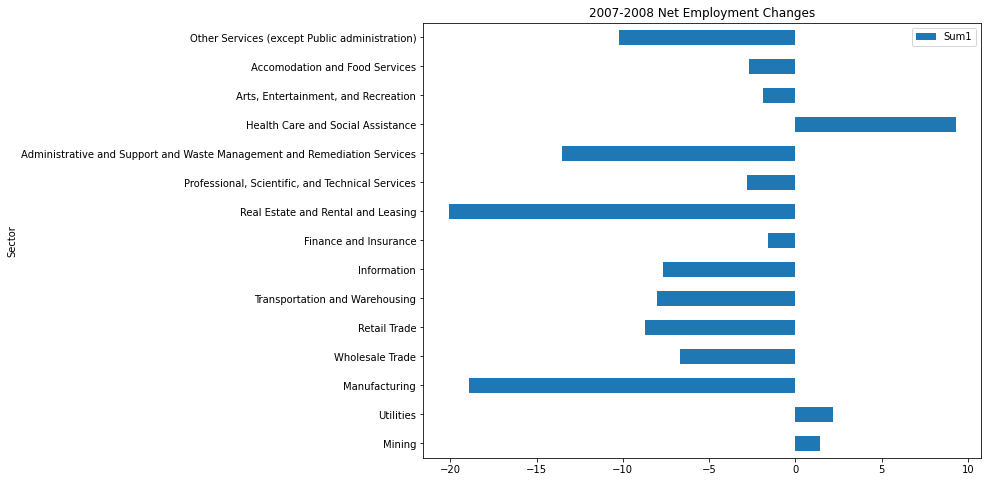

In [431]:
fig, ax = plt.subplots(figsize = (10,8))
new_df.plot(kind='barh', x='Sector', y='Sum1', ax=ax).set(title="2007-2008 Net Employment Changes");

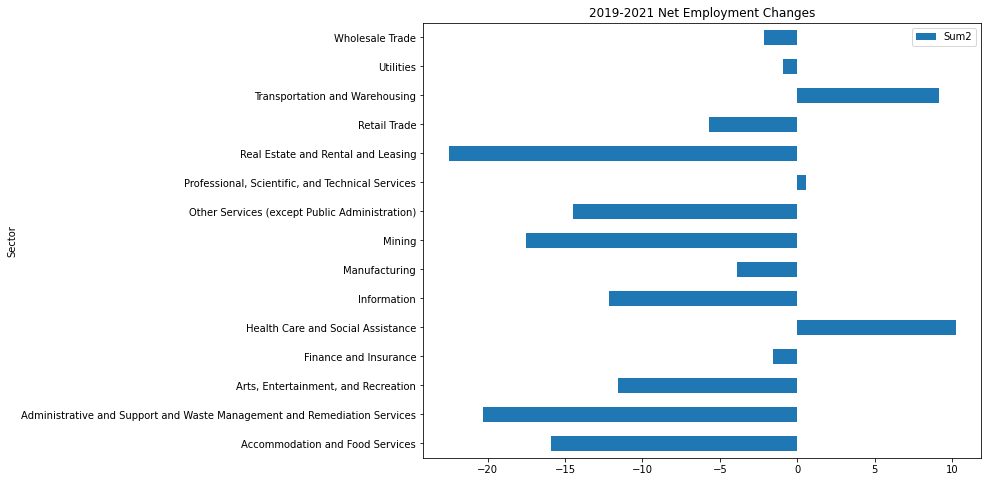

In [432]:
fig, ax = plt.subplots(figsize = (10,8))
df_19_20_21.plot(kind='barh', x='Sector', y='Sum2', ax=ax).set(title="2019-2021 Net Employment Changes");

In [355]:
grouped = new_df.merge(df_19_20_21, on='Sector')

In [356]:
grouped

,Sector,2007,2008,2009,Sum_x,Sum1,2019,2020,2021,Sum_y,Sum2
0,Mining,6.1,3.7,-8.4,1.4,1.4,0.242857,-13.835714,-3.935714,-17.528571,-17.528571
1,Utilities,1.4,0.3,0.5,2.2,2.2,0.028571,-0.928571,-0.014286,-0.914286,-0.914286
2,Manufacturing,-2.3,-4.4,-12.2,-18.9,-18.9,0.771859,-5.434673,0.763819,-3.898995,-3.898995
3,Wholesale Trade,1.1,-1.1,-6.7,-6.7,-6.7,0.836000,-4.560000,1.584000,-2.140000,-2.140000
4,Retail Trade,0.6,-3.6,-5.7,-8.7,-8.7,-1.901724,-9.968966,6.155172,-5.715517,-5.715517
5,Transportation and Warehousing,0.8,-2.8,-6.0,-8.0,-8.0,3.456000,0.496000,5.212000,9.164000,9.164000
6,Information,-0.2,-2.1,-5.4,-7.7,-7.7,-1.072727,-7.254545,-3.859091,-12.186364,-12.186364
7,Finance and Insurance,1.6,0.0,-3.2,-1.6,-1.6,0.800000,-0.300000,-2.100000,-1.600000,-1.600000
8,Real Estate and Rental and Leasing,-7.1,-2.1,-10.9,-20.1,-20.1,-2.925000,-14.650000,-4.950000,-22.525000,-22.525000
9,"Professional, Scientific, and Technical Services",3.5,-0.6,-5.7,-2.8,-2.8,1.585714,-4.357143,3.307143,0.535714,0.535714


In [361]:
stacked = grouped[['Sector', 'Sum1', 'Sum2']]

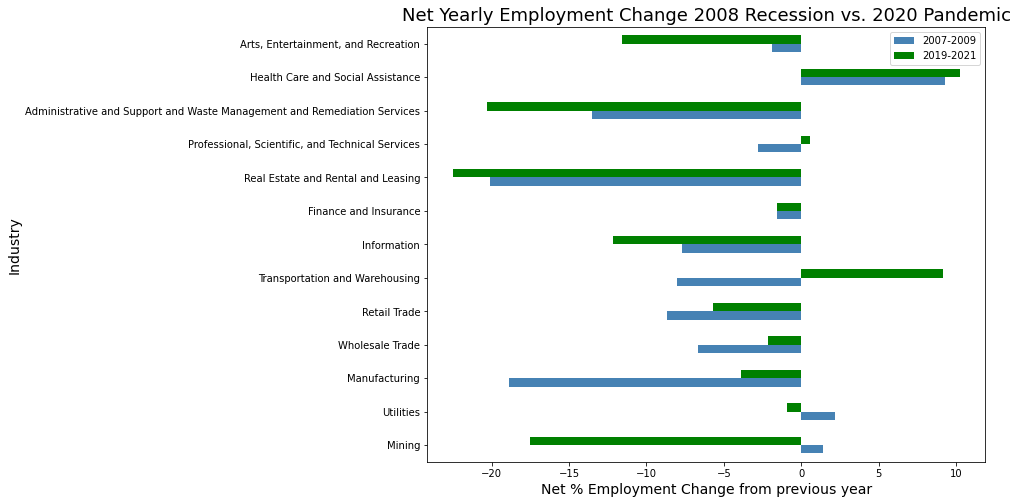

In [380]:
fig, ax = plt.subplots(figsize=(10,8))
stacked.set_index('Sector').plot(kind='barh', stacked=False, color=['steelblue', 'green'], ax=ax);
plt.legend(labels=('2007-2009', '2019-2021'))
plt.title("Net Yearly Employment Change 2008 Recession vs. 2020 Pandemic", fontsize=18)
plt.xlabel("Net % Employment Change from previous year", fontsize=14)
plt.ylabel("Industry", fontsize=14);

In [367]:
x = grouped[['Sum1', 'Sum2']]
y = grouped[['Sector']]

sns.catplot(x=x, y=y)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [346]:
df_19_20_21['sum'] = df_19_20_21.groupby('Sector').sum()

ValueError: Wrong number of items passed 3, placement implies 1

In [307]:
df_19_20_21.groupby[0].sum()

TypeError: 'method' object is not subscriptable

In [ ]:
df_19_20_21.groupby('Sector')['2019'].sum().sort_values()

In [282]:
df_19_20_21.groupby('Sector')['2020'].sum().sort_values()

Sector
Arts, Entertainment, and Recreation                                        -28.820000
Accommodation and Food Services                                            -25.092857
Administrative and Support and Waste Management and Remediation Services   -15.300000
Other Services (except Public Administration)                              -14.914286
Real Estate and Rental and Leasing                                         -14.650000
Mining                                                                     -13.835714
Retail Trade                                                                -9.968966
Information                                                                 -7.254545
Manufacturing                                                               -5.434673
Wholesale Trade                                                             -4.560000
Professional, Scientific, and Technical Services                            -4.357143
Health Care and Social Assistance              

In [283]:
df_19_20_21.groupby('Sector')['2021'].sum().sort_values()

Sector
Real Estate and Rental and Leasing                                          -4.950000
Administrative and Support and Waste Management and Remediation Services    -4.616667
Mining                                                                      -3.935714
Information                                                                 -3.859091
Finance and Insurance                                                       -2.100000
Utilities                                                                   -0.014286
Manufacturing                                                                0.763819
Wholesale Trade                                                              1.584000
Other Services (except Public Administration)                                1.842857
Professional, Scientific, and Technical Services                             3.307143
Transportation and Warehousing                                               5.212000
Retail Trade                                   

In [284]:
pand_swap = df_19_20_21.swapaxes('index', 'columns')
pand_swap

Sector,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Arts, Entertainment, and Recreation",Finance and Insurance,Health Care and Social Assistance,Information,Manufacturing,Mining,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
2019,1.900000,-0.366667,2.70,0.8,3.62,-1.072727,0.771859,0.242857,-1.414286,1.585714,-2.925,-1.901724,3.456,0.028571,0.836
2020,-25.092857,-15.300000,-28.82,-0.3,-1.06,-7.254545,-5.434673,-13.835714,-14.914286,-4.357143,-14.650,-9.968966,0.496,-0.928571,-4.560
2021,7.271429,-4.616667,14.51,-2.1,7.68,-3.859091,0.763819,-3.935714,1.842857,3.307143,-4.950,6.155172,5.212,-0.014286,1.584


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

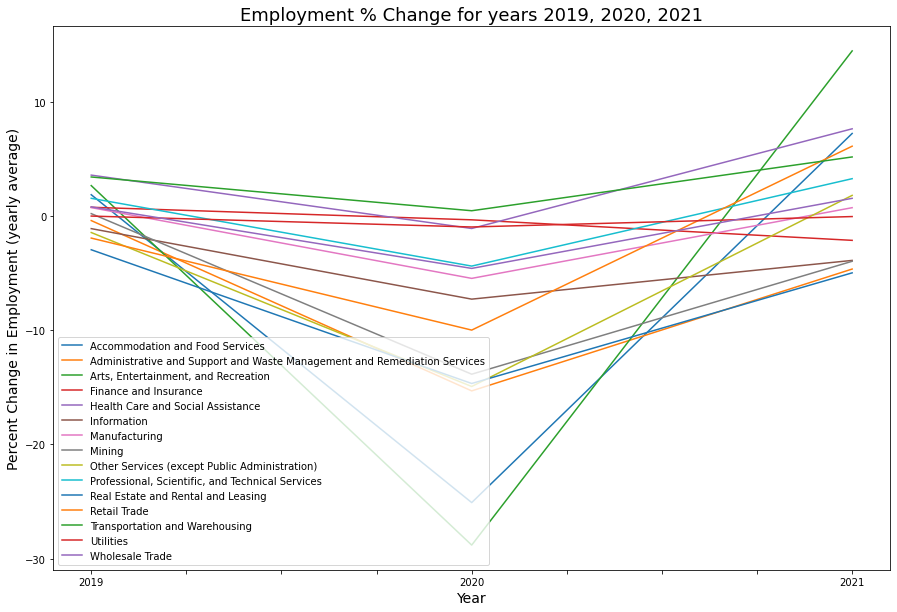

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
pand_swap.plot(ax=ax)
plt.legend(loc='lower left')
ax.set_title("Employment % Change for years 2019, 2020, 2021", fontsize=18)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Percent Change in Employment (yearly average)", fontsize=14);

###### Creating a new dataframe with the mean percent change in employement values for each sector, for each year, that were determined in excel:

In [134]:
data = [['Mining', 6.1, 3.7, (-8.4)],['Utilities', 1.4, 0.3, 0.5], ['Manufacturing', (-2.3), (-4.4), (-12.2)], ['Wholesale Trade', 1.1, (-1.1), (-6.7)], ['Retail Trade', 0.6, (-3.6), (-5.7)], ['Transportation and Warehousing', 0.8, (-2.8), (-6)], ['Information', (-0.2), (-2.1), (-5.4)], ['Finance and Insurance', 1.6, 0, (-3.2)], ['Real Estate and Rental and Leasing', (-7.1), (-2.1), (-10.9)], ['Professional, Scientific, and Technical Services', 3.5, (-0.6), (-5.7)], ['Administrative and Support and Waste Management and Remediation Services', (-1.1), (-1.1), (-11.3)], ['Health Care and Social Assistance', 6, 1.1, 2.2], ['Arts, Entertainment, and Recreation', 1.5, (-0.1), (-3.3)], ['Accomodation and Food Services', 1.4, (-0.9), (-3.2)], ['Other Services (except Public administration)', (-0.6), (-2.6), (-7)]]
new_df = pd.DataFrame(data, columns=['Industry', '2007', '2008', '2009'])
new_df = new_df.rename(columns={"Industry": "Sector"})
new_index_df = new_df.set_index('Sector')
new_index_df

,2007,2008,2009
Sector,,,
Mining,6.1,3.7,-8.4
Utilities,1.4,0.3,0.5
Manufacturing,-2.3,-4.4,-12.2
Wholesale Trade,1.1,-1.1,-6.7
Retail Trade,0.6,-3.6,-5.7
Transportation and Warehousing,0.8,-2.8,-6.0
Information,-0.2,-2.1,-5.4
Finance and Insurance,1.6,0.0,-3.2
Real Estate and Rental and Leasing,-7.1,-2.1,-10.9


In [135]:
new_index_df.rename({"Accomodation and Food Services": "Accommodation and Food Services"}, inplace=True)



In [136]:
#new_index_df_ = new_index_df.rename(columns={"Accomodation and Food Services": "Accommodation and Food Services"}, inplace=True)
#new_index_df_


In [137]:
new_index_df

,2007,2008,2009
Sector,,,
Mining,6.1,3.7,-8.4
Utilities,1.4,0.3,0.5
Manufacturing,-2.3,-4.4,-12.2
Wholesale Trade,1.1,-1.1,-6.7
Retail Trade,0.6,-3.6,-5.7
Transportation and Warehousing,0.8,-2.8,-6.0
Information,-0.2,-2.1,-5.4
Finance and Insurance,1.6,0.0,-3.2
Real Estate and Rental and Leasing,-7.1,-2.1,-10.9


In [213]:
bothyrgroups = df_19_20_21.merge(new_index_df, how='outer', on='Sector')
bothyrgroups

,2019,2020,2021,2007,2008,2009
Sector,,,,,,
Accommodation and Food Services,1.900000,-25.092857,7.271429,1.4,-0.9,-3.2
Administrative and Support and Waste Management and Remediation Services,-0.366667,-15.300000,-4.616667,-1.1,-1.1,-11.3
"Arts, Entertainment, and Recreation",2.700000,-28.820000,14.510000,1.5,-0.1,-3.3
Finance and Insurance,0.800000,-0.300000,-2.100000,1.6,0.0,-3.2
Health Care and Social Assistance,3.620000,-1.060000,7.680000,6.0,1.1,2.2
Information,-1.072727,-7.254545,-3.859091,-0.2,-2.1,-5.4
Manufacturing,0.771859,-5.434673,0.763819,-2.3,-4.4,-12.2
Mining,0.242857,-13.835714,-3.935714,6.1,3.7,-8.4
Other Services (except Public Administration),-1.414286,-14.914286,1.842857,NaN,NaN,NaN


In [210]:
bothyrgroups = bothyrgroups.swapaxes('index', 'columns').reset_index()

In [214]:
bothyrgroups = bothyrgroups.stack().reset_index()

In [224]:
bothyrgroups.columns

Index(['Sector', 'level_1', 0], dtype='object')

In [227]:
bothyrgroups = bothyrgroups.rename(columns={0:'employment'})

In [232]:
bothyrgroups['Sector'].unique()

array(['Accommodation and Food Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Arts, Entertainment, and Recreation', 'Finance and Insurance',
       'Health Care and Social Assistance', 'Information',
       'Manufacturing', 'Mining',
       'Other Services (except Public Administration)',
       'Professional, Scientific, and Technical Services',
       'Real Estate and Rental and Leasing', 'Retail Trade',
       'Transportation and Warehousing', 'Utilities', 'Wholesale Trade',
       'Other Services (except Public administration)'], dtype=object)

In [234]:
group1 = bothyrgroups[(bothyrgroups['Sector'].isin(['Accommodation and Food Services', 'Administrative and Support and Waste Management and Remediation Services', 'Arts, Entertainment, and Recreation', 'Finance and Insurance', 'Arts, Entertainment, and Recreation', 'Finance and Insurance', 'Health Care and Social Assistance']))]
group2 = bothyrgroups[(bothyrgroups['Sector'].isin(['Information', 'Manufacturing', 'Mining', 'Other Services (except Public Administration)', 'Professional, Scientific, and Technical Services']))]
group2 = bothyrgroups[(bothyrgroups['Sector'].isin(['Real Estate and Rental and Leasing', 'Retail Trade', 'Transportation and Warehousing', 'Utilities', 'Wholesale Trade', 'Other Services (except Public administration)']))]
                       

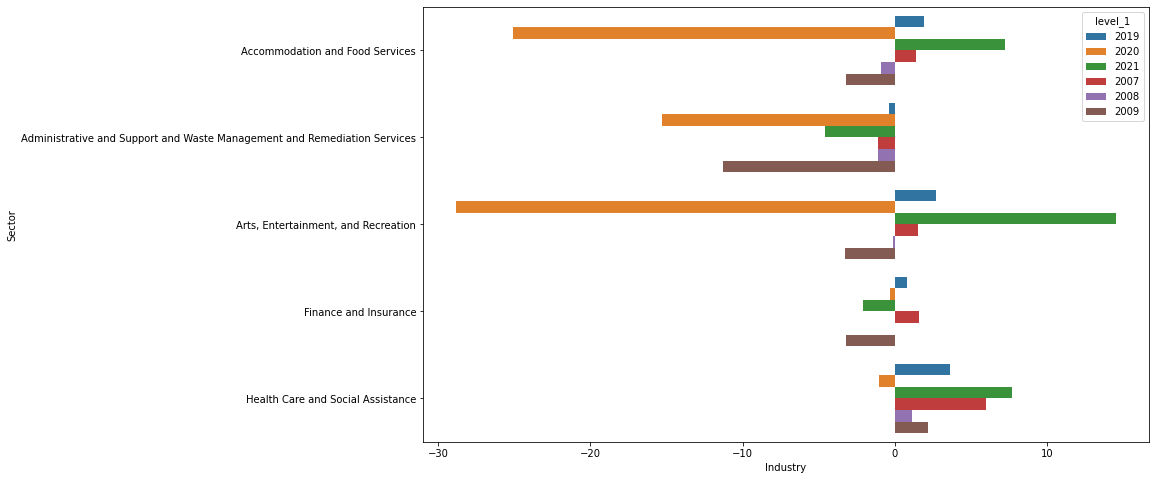

In [252]:

fig, ax = plt.subplots(figsize = (13,8))
sns.barplot(data=group1,x='employment', y='Sector', hue='level_1', orient='h')
plt.xlabel('Industry');
#plt.xticks(rotation=45);

<Axes: xlabel='employment', ylabel='Sector'>

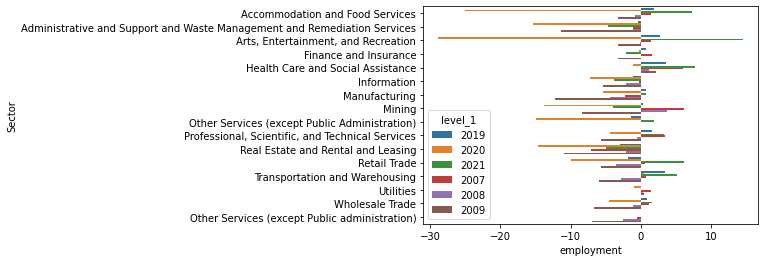

In [231]:
sns.barplot(data=bothyrgroups,x='employment', y='Sector', hue='level_1', orient='h')

In [171]:
bothyrgroups1 = bothyrgroups.rename(columns={'0': 'employment'})


In [172]:
bothyrgroups1

,Sector,level_1,0
0,Accommodation and Food Services,2019,1.900000
1,Accommodation and Food Services,2020,-25.092857
2,Accommodation and Food Services,2021,7.271429
3,Accommodation and Food Services,2007,1.400000
4,Accommodation and Food Services,2008,-0.900000
...,...,...,...
85,Wholesale Trade,2008,-1.100000
86,Wholesale Trade,2009,-6.700000
87,Other Services (except Public administration),2007,-0.600000
88,Other Services (except Public administration),2008,-2.600000


In [55]:
first5_1 = bothyrgroups[['2007', '2008', '2009']]
first5_2 = bothyrgroups[['2019', '2020', '2021']]

In [ ]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Day', y='Customers', hue='Sector', data=bothyrgroups) 

In [54]:
swap_df = new_index_df.swapaxes('index', 'columns')
swap_df

Sector,Mining,Utilities,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing,Information,Finance and Insurance,Real Estate and Rental and Leasing,"Professional, Scientific, and Technical Services",Administrative and Support and Waste Management and Remediation Services,Health Care and Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,Other Services (except Public administration)
2007,6.1,1.4,-2.3,1.1,0.6,0.8,-0.2,1.6,-7.1,3.5,-1.1,6.0,1.5,1.4,-0.6
2008,3.7,0.3,-4.4,-1.1,-3.6,-2.8,-2.1,0.0,-2.1,-0.6,-1.1,1.1,-0.1,-0.9,-2.6
2009,-8.4,0.5,-12.2,-6.7,-5.7,-6.0,-5.4,-3.2,-10.9,-5.7,-11.3,2.2,-3.3,-3.2,-7.0


In [39]:
swap_2020 = pandemic_changes.swapaxes('index', 'columns')

###### Plotting this dataframe to show percent changes in employement for each sector during these years:

In [40]:
swap_df

Sector,Mining,Utilities,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing,Information,Finance and Insurance,Real Estate and Rental and Leasing,"Professional, Scientific, and Technical Services",Administrative and Support and Waste Management and Remediation Services,Health Care and Social Assistance,"Arts, Entertainment, and Recreation",Accomodation and Food Services,Other Services (except Public administration)
2007,6.1,1.4,-2.3,1.1,0.6,0.8,-0.2,1.6,-7.1,3.5,-1.1,6.0,1.5,1.4,-0.6
2008,3.7,0.3,-4.4,-1.1,-3.6,-2.8,-2.1,0.0,-2.1,-0.6,-1.1,1.1,-0.1,-0.9,-2.6
2009,-8.4,0.5,-12.2,-6.7,-5.7,-6.0,-5.4,-3.2,-10.9,-5.7,-11.3,2.2,-3.3,-3.2,-7.0


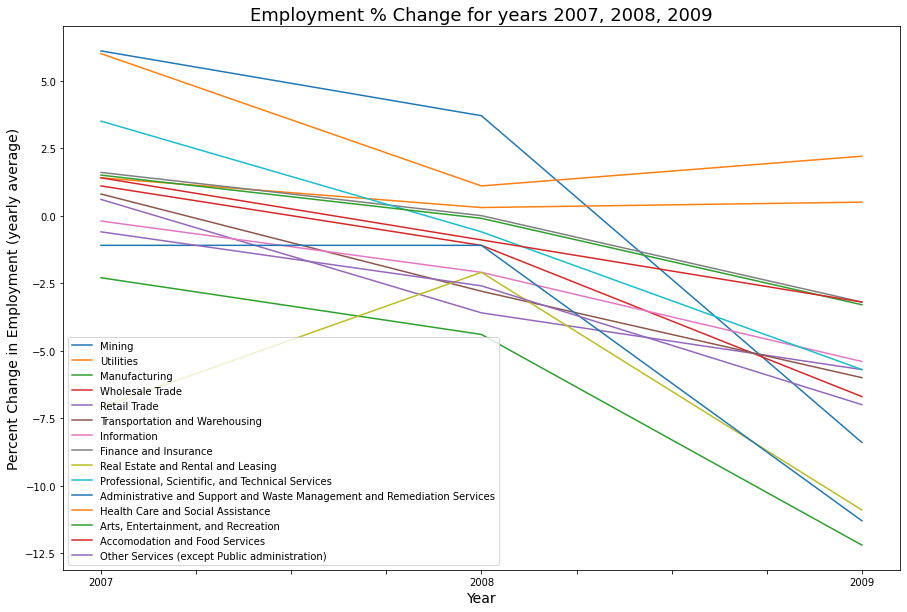

In [41]:

fig, ax = plt.subplots(figsize=(15,10))
swap_df.plot(ax=ax)
plt.legend(loc='lower left')
ax.set_title("Employment % Change for years 2007, 2008, 2009", fontsize=18)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Percent Change in Employment (yearly average)", fontsize=14);

I am going to split these sectors into 3 groups of 5 (there are 15 sectors total) so that when shown on a plot, it is easier to interpret.

In [42]:
#swap_df['Cat'] = 'Cat1'
#pand_swap['Cat'] = 'Cat2'

#dfs = [swap_df,pand_swap]
#result = pd.concat(dfs).reset_index()

#print(result)

In [43]:
swap_df.describe()

Sector,Mining,Utilities,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing,Information,Finance and Insurance,Real Estate and Rental and Leasing,"Professional, Scientific, and Technical Services",Administrative and Support and Waste Management and Remediation Services,Health Care and Social Assistance,"Arts, Entertainment, and Recreation",Accomodation and Food Services,Other Services (except Public administration)
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00,3.000000
mean,0.466667,0.733333,-6.300000,-2.233333,-2.900000,-2.666667,-2.566667,-0.533333,-6.700000,-0.933333,-4.500000,3.100000,-0.633333,-0.90,-3.400000
std,7.771958,0.585947,5.216321,4.021608,3.207803,3.401960,2.631223,2.444040,4.413615,4.609049,5.888973,2.570992,2.444040,2.30,3.274141
min,-8.400000,0.300000,-12.200000,-6.700000,-5.700000,-6.000000,-5.400000,-3.200000,-10.900000,-5.700000,-11.300000,1.100000,-3.300000,-3.20,-7.000000
25%,-2.350000,0.400000,-8.300000,-3.900000,-4.650000,-4.400000,-3.750000,-1.600000,-9.000000,-3.150000,-6.200000,1.650000,-1.700000,-2.05,-4.800000
50%,3.700000,0.500000,-4.400000,-1.100000,-3.600000,-2.800000,-2.100000,0.000000,-7.100000,-0.600000,-1.100000,2.200000,-0.100000,-0.90,-2.600000
75%,4.900000,0.950000,-3.350000,0.000000,-1.500000,-1.000000,-1.150000,0.800000,-4.600000,1.450000,-1.100000,4.100000,0.700000,0.25,-1.600000
max,6.100000,1.400000,-2.300000,1.100000,0.600000,0.800000,-0.200000,1.600000,-2.100000,3.500000,-1.100000,6.000000,1.500000,1.40,-0.600000


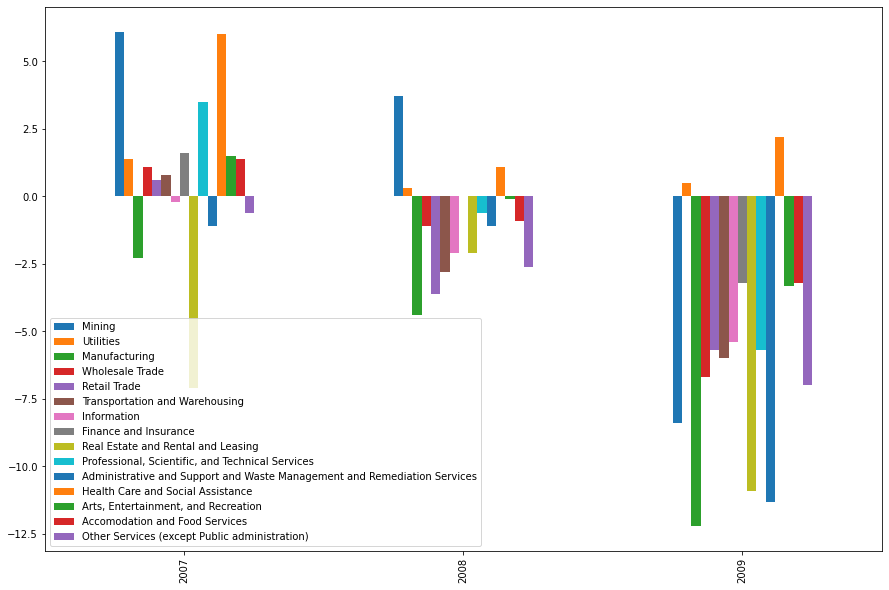

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
swap_df.plot.bar(ax=ax)
plt.legend(loc='lower left')

NameError: name 'result' is not defined

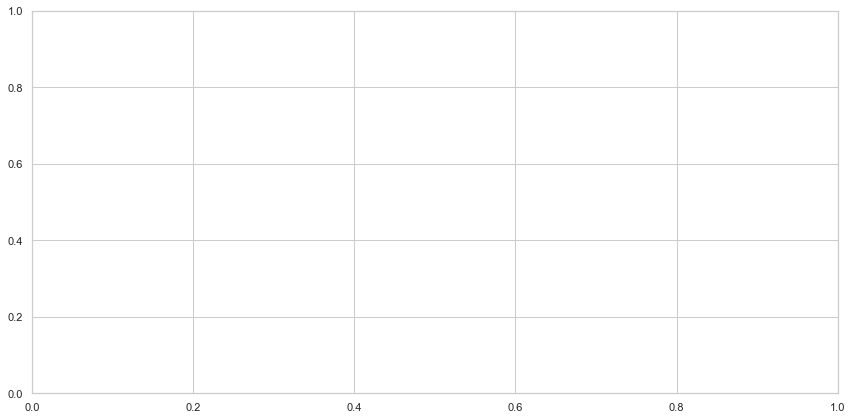

In [45]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#test_dict1 = {'item1':4, 'item2':6, 'item3':7,'item4':8,'item5':10}
#test_dict2 = {'item1':4, 'item2':6, 'item3':7,'item7':8,'item6':10}

#df = pd.DataFrame({'test_dict1':pd.Series(test_dict1),'test_dict2':pd.Series(test_dict2)}).reset_index()
#df = df.set_axis(['Item', 'DictOne', 'DictTwo'], axis=1)

#test1_df = pd.DataFrame(test_dict1.items(), columns=['Area','Number'])
#test2_df = pd.DataFrame(test_dict2.items(), columns=['Area','Number'])




from matplotlib import rcParams
sns.set(style="whitegrid")
rcParams.update({'figure.autolayout': True})
fig, ax1 = plt.subplots(figsize=(12,6))

result.plot.bar(x='index', ax=ax1)
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

In [62]:
#import seaborn as sns
#sns.set_theme(style="whitegrid")
#swap_df
#pand_swap
#penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
#g = sns.catplot(
   # data=penguins, kind="bar",
   # x="species", y="body_mass_g", hue="Industry",
   # errorbar="sd", palette="dark", alpha=.6, height=6
#)
#g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
#g.legend.set_title("")

###### Creating new dataframes for this:

In [63]:
swap_df

Sector,Mining,Utilities,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing,Information,Finance and Insurance,Real Estate and Rental and Leasing,"Professional, Scientific, and Technical Services",Administrative and Support and Waste Management and Remediation Services,Health Care and Social Assistance,"Arts, Entertainment, and Recreation",Accomodation and Food Services,Other Services (except Public administration)
2007,6.1,1.4,-2.3,1.1,0.6,0.8,-0.2,1.6,-7.1,3.5,-1.1,6.0,1.5,1.4,-0.6
2008,3.7,0.3,-4.4,-1.1,-3.6,-2.8,-2.1,0.0,-2.1,-0.6,-1.1,1.1,-0.1,-0.9,-2.6
2009,-8.4,0.5,-12.2,-6.7,-5.7,-6.0,-5.4,-3.2,-10.9,-5.7,-11.3,2.2,-3.3,-3.2,-7.0


In [64]:
pand_df1 = pand_swap[['Mining','Manufacturing','Wholesale Trade','Retail Trade','Accommodation and Food Services']]
    #['Mining', 6.1, 3.7, (-8.4)], ['Manufacturing', (-2.3), (-4.4), (-12.2)], ['Wholesale Trade', 1.1, (-1.1), (-6.7)], ['Retail Trade', 0.6, (-3.6), (-5.7)], ['Accomodation and Food Services', 1.4, (-0.9), (-3.2)]]

recess_df1 = swap_df[['Mining','Manufacturing','Wholesale Trade','Retail Trade','Accomodation and Food Services']]

In [65]:
recess_df1.rename(columns={"Accomodation and Food Services": "Accommodation and Food Services"}, inplace=True)



/Users/nicolemichaud/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [66]:
recess_df1

Sector,Mining,Manufacturing,Wholesale Trade,Retail Trade,Accommodation and Food Services
2007,6.1,-2.3,1.1,0.6,1.4
2008,3.7,-4.4,-1.1,-3.6,-0.9
2009,-8.4,-12.2,-6.7,-5.7,-3.2


In [67]:
pand_df1

Sector,Mining,Manufacturing,Wholesale Trade,Retail Trade,Accommodation and Food Services
2019,0.242857,0.771859,0.836,-1.901724,1.900000
2020,-13.835714,-5.434673,-4.560,-9.968966,-25.092857
2021,-3.935714,0.763819,1.584,6.155172,7.271429


In [68]:
#recess_df1['Cat'] = 'Cat1'
#pand_df1['Cat'] = 'Cat2'

#dfs = [recess_df1,pand_df1]
#result = pd.concat(dfs).rese

#print(result)

In [91]:
first5=recess_df1.join(pand_df1,  lsuffix="_left", rsuffix="_right",how='outer').reset_index()

In [70]:
df3=pd.merge(df1,df2, on='Courses', lsuffix="_left", rsuffix="_right", how='outer')

NameError: name 'df1' is not defined

In [88]:
first5=pd.concat([recess_df1,pand_df1],axis=1, lsuffix="_left", rsuffix="_right",join='outer')
first5

TypeError: concat() got an unexpected keyword argument 'lsuffix'

In [93]:
recess_df1

Sector,Mining,Manufacturing,Wholesale Trade,Retail Trade,Accommodation and Food Services
2007,6.1,-2.3,1.1,0.6,1.4
2008,3.7,-4.4,-1.1,-3.6,-0.9
2009,-8.4,-12.2,-6.7,-5.7,-3.2


In [ ]:
x1 = recess_df1
y1 = 

In [112]:
g = sns.catplot(
    data=result, kind="bar",
    x="index",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

AttributeError: 'function' object has no attribute 'get'

In [ ]:
sns.barplot

In [41]:
data1 = [['Mining', 6.1, 3.7, (-8.4)], ['Manufacturing', (-2.3), (-4.4), (-12.2)], ['Wholesale Trade', 1.1, (-1.1), (-6.7)], ['Retail Trade', 0.6, (-3.6), (-5.7)], ['Accomodation and Food Services', 1.4, (-0.9), (-3.2)]]
data2 = [['Utilities', 1.4, 0.3, 0.5],['Transportation and Warehousing', 0.8, (-2.8), (-6)],['Information', (-0.2), (-2.1), (-5.4)], ['Administrative and Support and Waste Management and Remediation Services', (-1.1), (-1.1), (-11.3)],['Other Services (except Public administration)', (-0.6), (-2.6), (-7)]]
data3 = [['Finance and Insurance', 1.6, 0, (-3.2)],['Real Estate and Rental and Leasing', (-7.1), (-2.1), (-10.9)],['Professional, Scientific, and Technical Services', 3.5, (-0.6), (-5.7)],['Health Care and Social Assistance', 6, 1.1, 2.2],['Arts, Entertainment, and Recreation', 1.5, (-0.1), (-3.3)],]

group_1 = pd.DataFrame(data1, columns=['Industry', '2007', '2008', '2009'])
group_2 = pd.DataFrame(data2, columns=['Industry', '2007', '2008', '2009'])
group_3 = pd.DataFrame(data3, columns=['Industry', '2007', '2008', '2009'])

group1_index = group_1.set_index('Industry')
group2_index = group_2.set_index('Industry')
group3_index = group_3.set_index('Industry')

group1_index.head()
group2_index.head()
group3_index.head()

,2007,2008,2009
Industry,,,
Finance and Insurance,1.6,0.0,-3.2
Real Estate and Rental and Leasing,-7.1,-2.1,-10.9
"Professional, Scientific, and Technical Services",3.5,-0.6,-5.7
Health Care and Social Assistance,6.0,1.1,2.2
"Arts, Entertainment, and Recreation",1.5,-0.1,-3.3


###### Plotting each of these new groups:

In [42]:
swap_group1 = group1_index.swapaxes('index', 'columns')
swap_group1

Industry,Mining,Manufacturing,Wholesale Trade,Retail Trade,Accomodation and Food Services
2007,6.1,-2.3,1.1,0.6,1.4
2008,3.7,-4.4,-1.1,-3.6,-0.9
2009,-8.4,-12.2,-6.7,-5.7,-3.2


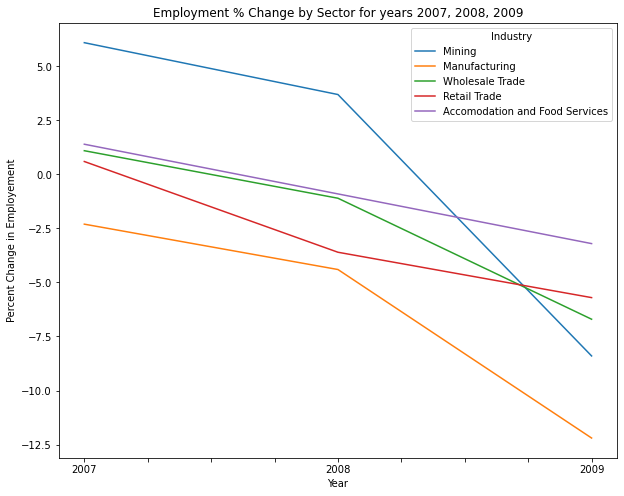

In [56]:
swap_group1.plot(title="Employment % Change by Sector for years 2007, 2008, 2009", figsize=(10,8), xlabel="Year", ylabel="Percent Change in Employement");

In [43]:
swap_group2 = group2_index.swapaxes('index', 'columns')
swap_group2

Industry,Utilities,Transportation and Warehousing,Information,Administrative and Support and Waste Management and Remediation Services,Other Services (except Public administration)
2007,1.4,0.8,-0.2,-1.1,-0.6
2008,0.3,-2.8,-2.1,-1.1,-2.6
2009,0.5,-6.0,-5.4,-11.3,-7.0


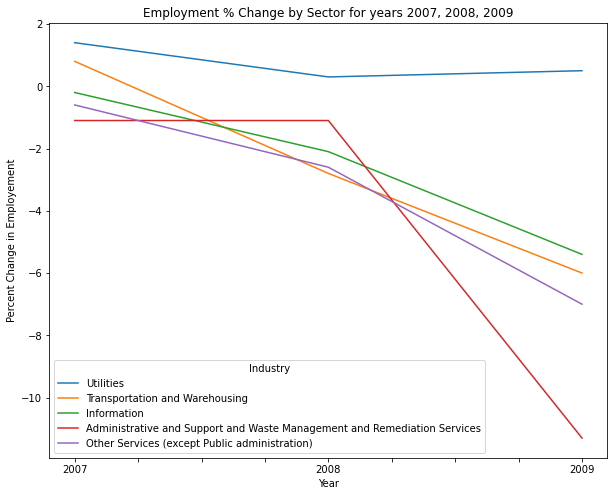

In [54]:
swap_group2.plot(title="Employment % Change by Sector for years 2007, 2008, 2009", figsize=(10,8), xlabel="Year", ylabel="Percent Change in Employement");

In [57]:
swap_group3 = group3_index.swapaxes('index', 'columns')
swap_group3

Industry,Finance and Insurance,Real Estate and Rental and Leasing,"Professional, Scientific, and Technical Services",Health Care and Social Assistance,"Arts, Entertainment, and Recreation"
2007,1.6,-7.1,3.5,6.0,1.5
2008,0.0,-2.1,-0.6,1.1,-0.1
2009,-3.2,-10.9,-5.7,2.2,-3.3


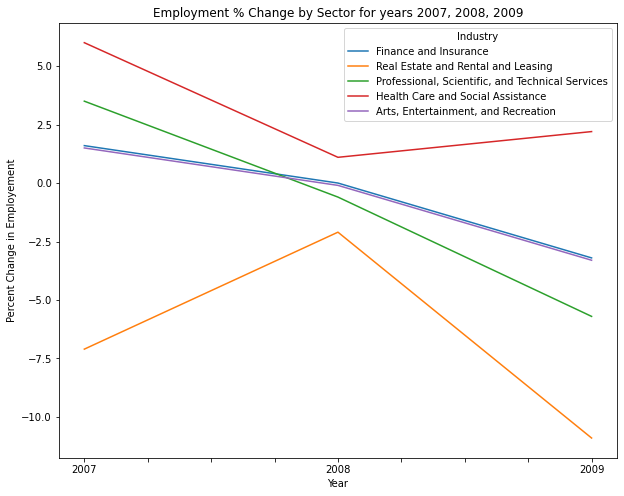

In [58]:
swap_group3.plot(title="Employment % Change by Sector for years 2007, 2008, 2009", figsize=(10,8), xlabel="Year", ylabel="Percent Change in Employement");

By looking at these graphs, as well as calculating the net percent employement change for each sector across this three year span, the three sectors that were negatively impacted the least in terms of employment were Health Care & Social Assistance, Utilities, and Mining.

To investigate further into which sub-industries (industries) are in each of these sectors that are contributing to their overall net employment percent change, I will calculate the net employment percent change for each sub-industry, create dataframes for each, and then plot those to visualize.

In [63]:
Mining_data = [['Mining', 5.2], ['Oil and gas extraction', 16.9], ['Mining, except oil and gas', (-4.1)], ['Support activities for mining', 6.9], ['Coal Mining', 5.2], ['Metal ore mining', 9.7], ['Non-metallic mineral mining', (-14.5)], ['Stone mining and quarrying', (-15.4)], ['Sand, gravel, clay, and ceramic and refractory minerals mining and quarrying', (-9.7)], ['Other non-metallic mineral mining and quarrying', (-9.7)]]
Utilities_data = [['Utilities', 2.1], ['Power generation and supply', 2.1], ['Natural gas distribution', 2.2], ['Water, sewage and other systems', 2.7]]
HCandSA_data = [['Medical and diagnostic laboratories', 9.7], ['Medical laboratories', 8.3], ['Diagnostic imaging centers', 12.9], ['Hospitals, except psychiatric', 5.3]]

Mining_ind = pd.DataFrame(Mining_data, columns=['Sub-Industry', 'Net Percent Change, Employment'])
Utilities_ind = pd.DataFrame(Utilities_data, columns=['Sub-Industry', 'Net Percent Change, Employment'])
HCandSA_ind = pd.DataFrame(HCandSA_data, columns=['Sub-Industry', 'Net Percent Change, Employment'])

Mining_index = Mining_ind.set_index('Sub-Industry')
Utilities_index = Utilities_ind.set_index('Sub-Industry')
HCandSA_index = HCandSA_ind.set_index('Sub-Industry')

Mining_index.head()
Utilities_index.head()
HCandSA_index.head()


,"Net Percent Change, Employment"
Sub-Industry,
Medical and diagnostic laboratories,9.7
Medical laboratories,8.3
Diagnostic imaging centers,12.9
"Hospitals, except psychiatric",5.3


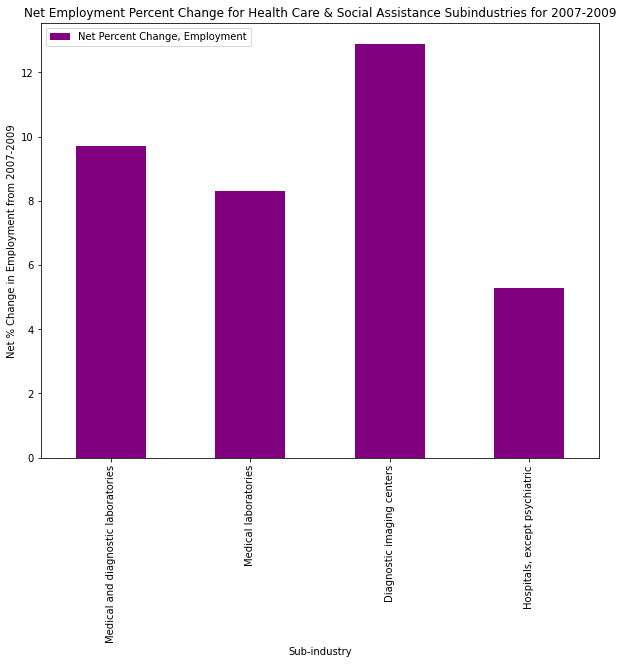

In [87]:
HCandSA_index.plot.bar(title="Net Employment Percent Change for Health Care & Social Assistance Subindustries for 2007-2009", xlabel="Sub-industry", ylabel="Net % Change in Employment from 2007-2009", figsize=(10,8), color='purple');


Of the sub-industries of the Health Care & Social Assistance sector, Diagnostic imaging Centers saw the highest net percent employment change, of 12.9% between the years 2007 to 2009.

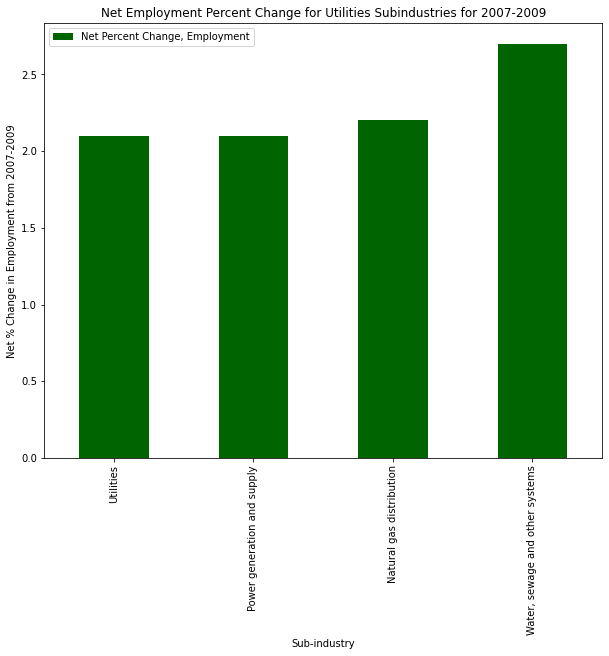

In [82]:
Utilities_index.plot.bar(title="Net Employment Percent Change for Utilities Subindustries for 2007-2009", xlabel="Sub-industry", ylabel="Net % Change in Employment from 2007-2009", figsize=(10,8), color='darkgreen');


Of the sub-industries within the Utilities sector/industry, Water, Sewage, and Other systems saw the highest net percent employment change, of 2.7% between the years 2007 to 2009.

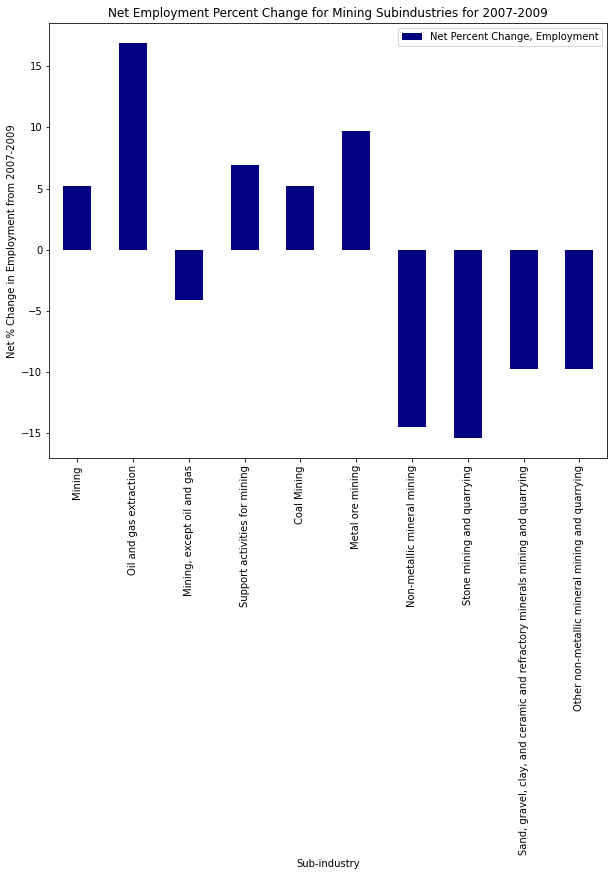

In [88]:
Mining_index.plot.bar(title="Net Employment Percent Change for Mining Subindustries for 2007-2009", xlabel="Sub-industry", ylabel="Net % Change in Employment from 2007-2009", figsize=(10,8), color="navy");

Of the sub-industries within the Mining  sector/industry, Oil and Gas Extraction saw the highest net percent employment change, of 16.9% between the years 2007 to 2009. Other sub-industries, (Mining, except oil and gas; Non-metalling mineral mining; Stone Mining and Quarrying; Sand, Gravel, clay, and ceramic and refractory minerals mining and quarrying; Other non-metallic mineral mining and quarrying) had negative net percentage changes, bringing the overall sector’s net percentage change down drastically.

In [6]:
labor_changes = labor_changes_df[(labor_changes_df['Measure'].isin(['Employment']))&(labor_changes_df['Units'].isin(['% Change from previous year', 'Thousands of jobs']))]
labor_changes

,Sector,Industry,Measure,Units,2007,2008,2009
9,Mining,Mining,Employment,% Change from previous year,8.1,6,-8.9
22,Mining,Mining,Employment,Thousands of jobs,684.8,726,661.5
32,Mining,Oil and gas extraction,Employment,% Change from previous year,7.7,8.8,0.4
45,Mining,Oil and gas extraction,Employment,Thousands of jobs,148.1,161.2,161.8
55,Mining,"Mining, except oil and gas",Employment,% Change from previous year,3,0.7,-7.8
...,...,...,...,...,...,...,...
15616,Other Services (except Public Administration),Funeral homes and funeral services,Employment,Thousands of jobs,105.4,108.3,103.4
15626,Other Services (except Public Administration),Coin-operated laundries and drycleaners,Employment,% Change from previous year,8.9,-4.7,-8.2
15639,Other Services (except Public Administration),Coin-operated laundries and drycleaners,Employment,Thousands of jobs,51.3,48.9,44.9
15649,Other Services (except Public Administration),Drycleaning and laundry services (except coin-...,Employment,% Change from previous year,0.1,-3.4,-9.2


In [7]:
labor_changes.isna().sum()

Sector      0
Industry    0
Measure     0
Units       0
2007        0
2008        0
2009        0
dtype: int64

In [8]:
labor_changes_2008 = labor_changes[['Sector', 'Industry', 'Measure', 'Units', '2008']]
labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(float)
labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(int)
print(labor_changes_2008.dtypes)

Sector      object
Industry    object
Measure     object
Units       object
2008         int64
dtype: object


<ipython-input-8-24969448f874>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(float)
<ipython-input-8-24969448f874>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_changes_2008['2008'] = labor_changes_2008['2008'].astype(int)


In [9]:
labor_changes_3yrs = labor_changes.copy()
labor_changes_3yrs['2007'] = labor_changes_3yrs['2007'].astype(float)
labor_changes_3yrs['2008'] = labor_changes_3yrs['2008'].astype(float)                  
labor_changes_3yrs['2009'] = labor_changes_3yrs['2009'].astype(float)                   
labor_changes_3yrs['2007'] = labor_changes_3yrs['2007'].astype(int)
labor_changes_3yrs['2008'] = labor_changes_3yrs['2008'].astype(int)                  
labor_changes_3yrs['2009'] = labor_changes_3yrs['2009'].astype(int)                   
labor_changes_3yrs.head()

,Sector,Industry,Measure,Units,2007,2008,2009
9,Mining,Mining,Employment,% Change from previous year,8,6,-8
22,Mining,Mining,Employment,Thousands of jobs,684,726,661
32,Mining,Oil and gas extraction,Employment,% Change from previous year,7,8,0
45,Mining,Oil and gas extraction,Employment,Thousands of jobs,148,161,161
55,Mining,"Mining, except oil and gas",Employment,% Change from previous year,3,0,-7


In [74]:
changes_3yrs_df = labor_changes_3yrs[['Industry', 'Units', '2007', '2008', '2009']]
changes_3yrs_df.head()

,Industry,Units,2007,2008,2009
9,Mining,% Change from previous year,8,6,-8
22,Mining,Thousands of jobs,684,726,661
32,Oil and gas extraction,% Change from previous year,7,8,0
45,Oil and gas extraction,Thousands of jobs,148,161,161
55,"Mining, except oil and gas",% Change from previous year,3,0,-7


In [39]:
three_yrs_percent = labor_changes_3yrs[(labor_changes_3yrs['Units'].isin(['% Change from previous year']))]
three_yrs_job_nums = labor_changes_3yrs[(labor_changes_3yrs['Units'].isin(['Thousands of jobs']))]
#labor_changes_3yrs[((labor_changes_3yrs['Units'].isin(['% Change from previous year', 'Thousands of jobs']))]
three_yrs_percent_df = three_yrs_percent[['Industry', '2007', '2008', '2009']]
three_yrs_percent_df.head()


,Industry,2007,2008,2009
9,Mining,8,6,-8
32,Oil and gas extraction,7,8,0
55,"Mining, except oil and gas",3,0,-7
78,Support activities for mining,12,8,-14
101,Oil and gas extraction,7,8,0


In [102]:
Industry_only = labor_changes_3yrs['Industry']
Years = labor_changes_3yrs[['2007', '2008', '2009']]
swap_yrs = Years.swapaxes("index", "columns")
swap_yrs


,9,22,32,45,55,68,78,91,101,114,...,15557,15570,15580,15593,15603,15616,15626,15639,15649,15662
2007,8,684,7,148,3,227,12,308,7,148,...,-7,25,-9,26,-2,105,8,51,0,190
2008,6,726,8,161,0,229,8,335,8,161,...,-5,24,-6,24,2,108,-4,48,-3,183
2009,-8,661,0,161,-7,211,-14,287,0,161,...,-23,18,-10,22,-4,103,-8,44,-9,166


In [70]:
three_yrs_percent_df.stack()

9      Industry                                               Mining
       2007                                                        8
       2008                                                        6
       2009                                                       -8
32     Industry                               Oil and gas extraction
                                         ...                        
15626  2009                                                       -8
15649  Industry    Drycleaning and laundry services (except coin-...
       2007                                                        0
       2008                                                       -3
       2009                                                       -9
Length: 1908, dtype: object

In [161]:
new_index = three_yrs_percent_df.set_index('Industry')
new_index.rename(columns = {'Industry':'Year'}, inplace = True)

In [164]:
new_index.rename(columns = {'Year':'Industry'}, inplace = True)

In [165]:
yrs_percent_swap = new_index.swapaxes("index", "columns")
#yrs_percent_swap.rename(columns= {"Industry": "Year"})
yrs_percent_swap.head()

Industry,Mining,Oil and gas extraction,"Mining, except oil and gas",Support activities for mining,Oil and gas extraction,Coal mining,Metal ore mining,Nonmetallic mineral mining and quarrying,Support activities for mining,Coal mining,...,"Hair, nail, and skin care services",Funeral homes and funeral services,Coin-operated laundries and drycleaners,Drycleaning and laundry services (except coin-operated),Linen and uniform supply,Photofinishing,Reupholstery and furniture repair,Funeral homes and funeral services,Coin-operated laundries and drycleaners,Drycleaning and laundry services (except coin-operated)
2007,8,7,3,12,7,-1,12,3,12,-1,...,0,-2,8,0,3,-7,-9,-2,8,0
2008,6,8,0,8,8,6,10,-6,8,6,...,-1,2,-4,-3,1,-5,-6,2,-4,-3
2009,-8,0,-7,-14,0,0,-13,-11,-14,0,...,3,-4,-8,-9,-6,-23,-10,-4,-8,-9


<AxesSubplot:>

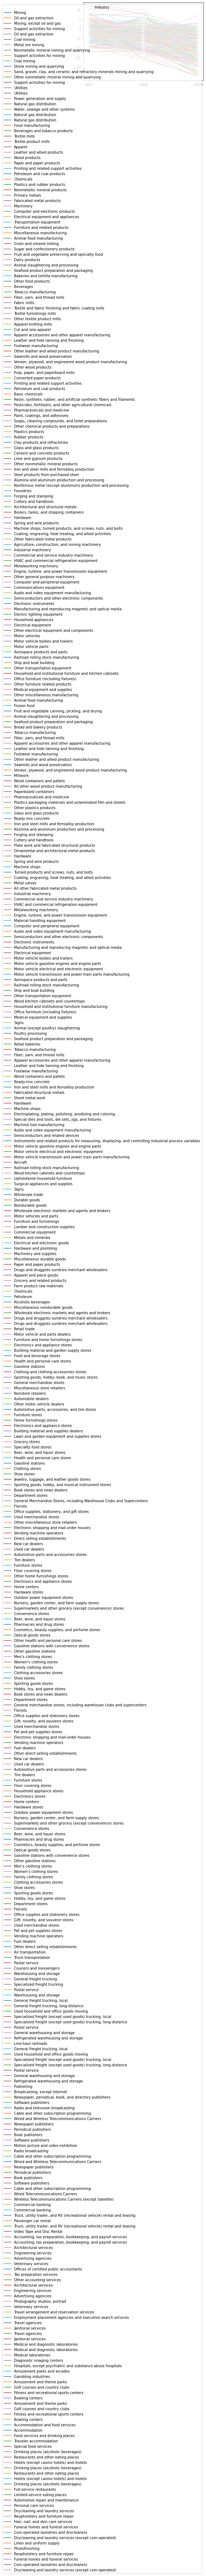

In [167]:
yrs_percent_swap.plot()

axes = labor_changes_3yrs['Sector'.plot.line(
    subplots=True, color={"pig": "pink", "horse": "#742802"}
)